In [1]:
import pandas as pd
from pandas import DataFrame,Series
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import statsmodels.formula.api as smf
import statsmodels.api as sm

In [3]:
import sklearn.model_selection as model_selection

In [4]:
import sklearn.metrics as metrics


In [5]:
####  data preparation has been done and saved that object named as dataframe.csv   ####
####  importing dataframe.csv file  ####

dt=pd.read_csv("dataframe.csv")

In [6]:
dt.dtypes

Unnamed: 0              int64
id                    float64
age                   float64
gender                 object
std_BG                 object
IN_STATE_FLAG           int64
INTERNATIONAL_STS       int64
STDNT_MAJOR            object
STDNT_MINOR            object
entrance_1            float64
entrance_2            float64
entrance_comb         float64
FIRST_TERM            float64
F_1_course             object
F_1_grade              object
F_2_course             object
F_2_grade              object
F_3_course             object
F_3_grade              object
F_4_course             object
F_4_grade              object
F_5_course             object
F_5_grade              object
F_6_course             object
F_6_grade              object
SECOND_TERM           float64
S_1_course             object
S_1_grade              object
S_2_course             object
S_2_grade              object
S_3_course             object
S_3_grade              object
S_4_course             object
S_4_grade 

#### EXPLORATORY DATA ANALYSIS  ####

In [7]:
dt[['gender','left']].groupby('gender').mean()

,left
gender,
F,0.221963
M,0.196187


In [8]:
dt[['SECOND_TERM','left']].groupby('SECOND_TERM').mean()

,left
SECOND_TERM,
200602.0,0.215010
200702.0,0.156942
200802.0,0.213052
200902.0,0.227194
201002.0,0.230769
201102.0,0.220285


INSIGHTS : SECOND_TERM variable
    Students who have enrolled on the year of 2007, more likely to continue the course compared to the students who have enrolled on the remaining year
    

In [9]:
dt[['S_1_grade','left']].groupby('S_1_grade').mean()

,left
S_1_grade,
A,0.139344
B,0.112723
C,0.141280
D,0.199601
F,0.313539
INCOMPL,0.423077
NOT REP,0.127660
UD,0.813853
Unknown,1.000000


INSIGHTS: S_1_grade varaible
    When student scored grade UD, more likely to leave the course
    when student secured grade B, more likely to continue the course 
    grade Unknown have only 6 observation 
   
    

In [10]:
dt[['S_2_grade','left']].groupby('S_2_grade').mean()

,left
S_2_grade,
A,0.133676
B,0.131485
C,0.169054
D,0.303571
F,0.453901
INCOMPL,0.500000
UD,0.502283


INSIGHTS: S_2_grade varaible
    When student scored grade UD, more likely to leave the course
    when student secured grade A & grade B, more likely to continue the course 
    grade Unknown have only 6 observation 
   

C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='hist')` instead of `Series.plot('hist',)`.
  
C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='hist')` instead of `Series.plot('hist',)`.
  This is separate from the ipykernel package so we can avoid doing imports until


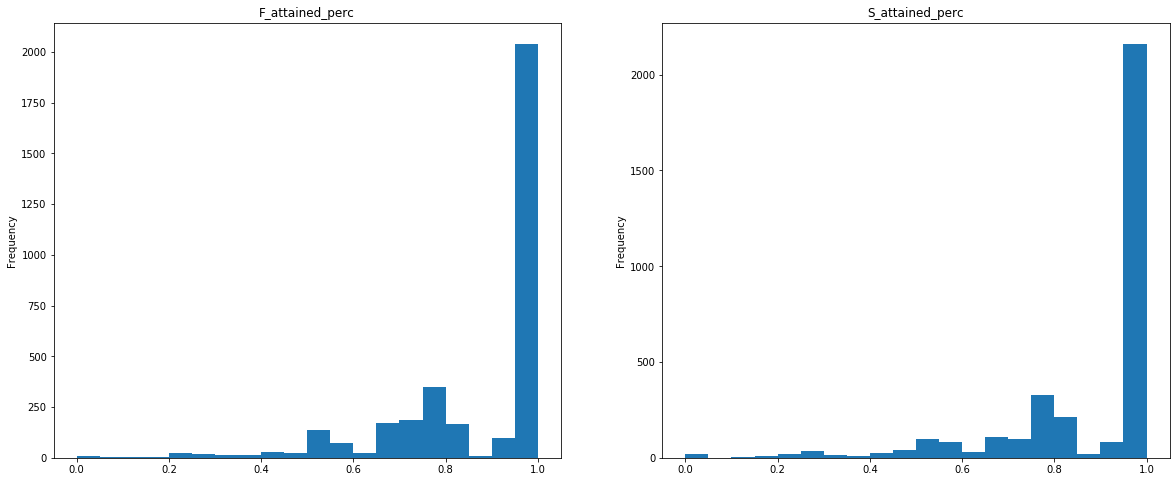

In [11]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize = (20,8))
dt.F_attained_perc.plot('hist', bins=20, ax=axes[0], title='F_attained_perc')
dt.S_attained_perc.plot('hist', bins=20, ax=axes[1], title='S_attained_perc')

INSIGHTS:  F_attained_per &  S_attained_per
    majority of the students has 100% percentage attendance on both FIRST & SECOND term.

C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='hist')` instead of `Series.plot('hist',)`.
  
C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='hist')` instead of `Series.plot('hist',)`.
  This is separate from the ipykernel package so we can avoid doing imports until


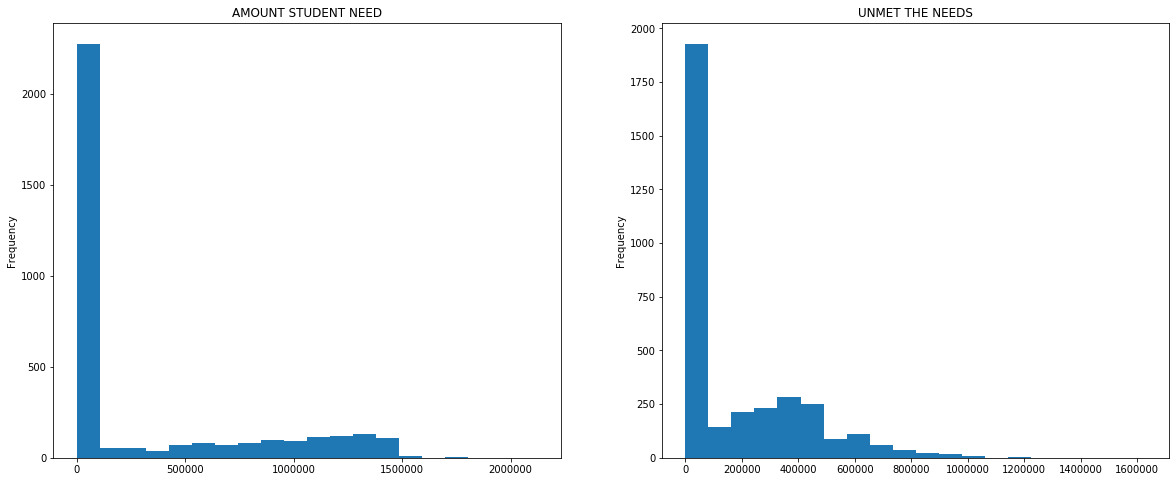

In [12]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize = (20,8))
dt.amt_std_need.plot('hist', bins=20, ax=axes[0], title='AMOUNT STUDENT NEED')
dt.unmet_std_need.plot('hist', bins=20, ax=axes[1], title='UNMET THE NEEDS')

In [13]:
dt.head()

,Unnamed: 0,id,age,gender,std_BG,IN_STATE_FLAG,INTERNATIONAL_STS,STDNT_MAJOR,STDNT_MINOR,entrance_1,...,F_total_hrs,F_earned_hrs,S_total_hrs,S_earned_hrs,amt_std_need,course_fee,e_fmly_contrb,unmet_std_need,F_attained_perc,S_attained_perc
0,0,7808615.0,18.0,F,BGD 1,1,0,Undeclared,N,0.0,...,16.0,16.0,14.0,14.0,0.0,0.0,0.0,0.0,1.0,1.0
1,1,7830063.0,19.0,F,BGD 1,0,0,Undeclared,N,26.0,...,18.0,18.0,18.0,18.0,570000.0,1355760.0,785760.0,459300.0,1.0,1.0
2,2,7847538.0,18.0,M,BGD 1,1,0,Mathematics,N,0.0,...,15.0,15.0,14.0,14.0,0.0,0.0,0.0,0.0,1.0,1.0
3,3,8006429.0,18.0,M,BGD 1,1,0,Undeclared,N,0.0,...,13.0,13.0,14.0,14.0,0.0,0.0,0.0,0.0,1.0,1.0
4,4,7962680.0,18.0,F,BGD 1,1,0,Art,N,0.0,...,12.0,12.0,12.0,12.0,835920.0,1355760.0,519840.0,278340.0,1.0,1.0


In [14]:
dt["entrance_comb"]=dt["entrance_comb"].replace(997,0)

In [15]:
dt1=dt.copy()

#####  INTERACTION VARIABLE    ######

1. unmet_percentage  =  unmet_std_need / course_fee
2. F_attained_hrs    =  F_earned_hrs / F_total_hrs
3. S_attained_hrs    =  S_earned_hrs / S_total_hrs
4. funding           =  unmet_std_need != amt_std_need ----> is 1 , else 0.

In [16]:
# F_attained_perc is interaction varaible which is derived from the F_total_hrs and F_earned_hrs so i have droped those two varibles

dt1=dt1.drop("F_total_hrs",axis=1)

In [17]:
dt1=dt1.drop("F_earned_hrs",axis=1)

In [18]:
#### S_attained_perc is interaction variable, so I droped those two variables

dt1=dt1.drop("S_total_hrs",axis=1)

In [19]:
dt1=dt1.drop("S_earned_hrs",axis=1)

In [20]:
dt1=dt1.drop("Unnamed: 0",axis=1)

In [21]:
dt1.shape

(3399, 51)

In [22]:
a=(dt1["amt_std_need"]==0)

In [23]:
dt1.loc[a,"unmet_std_need"]=0

In [24]:
## unmet_percentage (interaction variable)  ####

dt1["unmet_percent"]=dt1["unmet_std_need"]/dt1["course_fee"]

In [25]:
dt1["unmet_percent"].head()

0         NaN
1    0.338777
2         NaN
3         NaN
4    0.205302
Name: unmet_percent, dtype: float64

In [26]:
dt1['unmet_percent']=dt1["unmet_percent"].fillna(0)

In [27]:
###  funding varaible (interaction variable)  ####

dt1["funding"]=dt1["unmet_std_need"]!=dt1["amt_std_need"] 

In [28]:
dt1["funding"]=dt1["funding"].astype('uint8')

In [29]:
dt1["funding"].value_counts()

0    2250
1    1149
Name: funding, dtype: int64

In [30]:
dt1["S_1_course"]=dt1["S_1_course"].str.replace("note","not_elected")

In [31]:
dt1["S_2_course"]=dt1["S_2_course"].str.replace("note","not_elected")

C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='hist')` instead of `Series.plot('hist',)`.
  """Entry point for launching an IPython kernel.


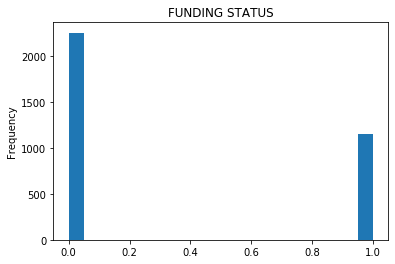

In [32]:

dt1.funding.plot('hist', bins=20,  title='FUNDING STATUS')


INSIGHTS : Interaction variable (Funding )
    funding=1 ,when the student recieved some amount (from Govt or NGO's) which they need to pay the fee event if they recieve                some amount and not the full amount.
               1149 students got fund.
    funding=0, when the student didn't recieve any amount which they need to pay the fee
               

###  FEATURE IMPORTANCE  ##

In [33]:
###  Going for Random Forest Classifier algorithm inorder to find the Feature_importances
###  Feature_importances will help to find the varible which is contributing more to my target variables
###  In this model my target variable is "left" i.e the student have left the course within one year  

In [34]:
###   RANDOM FOREST CLASSIFIER   ###

In [35]:
X=dt1.drop("left",axis=1)

In [36]:
X=pd.get_dummies(X)

In [37]:
y=dt1["left"]

In [38]:
from sklearn.ensemble import RandomForestClassifier

In [39]:
X_train,X_test,y_train,y_test=model_selection.train_test_split(X,y,test_size=0.20,random_state=200)

In [40]:
rf_model=RandomForestClassifier(oob_score=True,n_jobs=-1,n_estimators=110,random_state=200)

In [41]:
rf_model=rf_model.fit(X_train,y_train)

In [42]:
rf_model.feature_importances_

array([2.28927686e-02, 6.66139240e-03, 3.20514250e-03, 1.83048185e-03,
       1.07383628e-02, 1.65547548e-02, 1.57975073e-02, 1.10967571e-02,
       1.19117217e-02, 1.51008220e-02, 2.20508404e-02, 9.55901058e-03,
       1.31203847e-02, 1.10208006e-02, 1.00164989e-02, 1.41306463e-02,
       1.66639929e-02, 1.24881016e-02, 3.85329453e-03, 4.99274015e-03,
       4.36416099e-03, 4.87094749e-03, 1.19646457e-03, 4.85024217e-03,
       2.27155393e-03, 4.45674772e-04, 1.02894310e-03, 6.71259989e-04,
       3.71413433e-05, 9.88247778e-04, 5.10137794e-04, 1.72271115e-03,
       2.27317111e-04, 2.90247274e-03, 5.81215783e-04, 8.53781972e-04,
       0.00000000e+00, 1.15128126e-03, 1.21449837e-03, 3.93661615e-04,
       1.64130618e-03, 2.32059363e-04, 1.59843908e-03, 4.56406584e-04,
       1.13725697e-03, 8.77840495e-04, 5.68961162e-04, 1.59475140e-03,
       7.36215131e-04, 6.25528731e-05, 3.03151967e-04, 1.18120711e-03,
       5.79473301e-04, 3.27381452e-06, 3.20062335e-04, 6.71209405e-04,
      

In [43]:
f_imp=pd.Series(rf_model.feature_importances_,index=X.columns)

In [44]:
f_imp.sort_values(ascending=False)

S_1_grade_UD                 0.049661
id                           0.022893
HIGH_SCHL_GPA                0.022051
S_1_course_not_elected       0.019833
S_attained_perc              0.016664
                               ...   
HIGH_SCHL_NAME_SCHOOL 324    0.000000
HIGH_SCHL_NAME_SCHOOL 329    0.000000
HIGH_SCHL_NAME_SCHOOL 332    0.000000
HIGH_SCHL_NAME_SCHOOL 334    0.000000
S_5_grade_F                  0.000000
Length: 946, dtype: float64

In [45]:
for w in range (230,350,10):
    rf_model1=RandomForestClassifier(n_estimators=w,random_state=200)
    rf_model1=rf_model1.fit(X_train,y_train)
    score=rf_model1.score(X_test,y_test)
    print("n_estimators is   " +str(w))
    print("the score is   " +str(score))

n_estimators is   230
the score is   0.8205882352941176
n_estimators is   240
the score is   0.8205882352941176
n_estimators is   250
the score is   0.8205882352941176
n_estimators is   260
the score is   0.8205882352941176
n_estimators is   270
the score is   0.8205882352941176
n_estimators is   280
the score is   0.8205882352941176
n_estimators is   290
the score is   0.8191176470588235
n_estimators is   300
the score is   0.8205882352941176
n_estimators is   310
the score is   0.8191176470588235
n_estimators is   320
the score is   0.8191176470588235
n_estimators is   330
the score is   0.8191176470588235
n_estimators is   340
the score is   0.8191176470588235


In [46]:
###  n_estimators = 300 which gave better oob_score when compared to other range of no's

rf_model2=RandomForestClassifier(oob_score=True,n_jobs=-1,n_estimators=300,random_state=200)

In [47]:
rf_model2=rf_model2.fit(X_train,y_train)

In [48]:
rf_model2.oob_score_

0.8333946303788158

In [49]:
rf_pred=rf_model2.predict(X_test)

In [50]:
metrics.confusion_matrix(y_test,rf_pred)

array([[526,   7],
       [115,  32]], dtype=int64)

In [51]:
metrics.roc_auc_score(y_test,rf_pred)

0.6022769332873863

In [52]:
metrics.accuracy_score(y_test,rf_pred)

0.8205882352941176

In [53]:
f_imp1=pd.Series(rf_model2.feature_importances_,index=X.columns)

In [54]:
###  Feature importances have found, i have took top 20 variables which is impacting more on my target varaible(left)

f_imp2=f_imp1.sort_values(ascending=False).head(20)

In [55]:
f_imp2.to_frame()

,0
S_1_grade_UD,0.043881
S_1_course_not_elected,0.023512
id,0.023509
HIGH_SCHL_GPA,0.021682
entrance_2,0.017233
S_attained_perc,0.016921
entrance_comb,0.016501
S_2_grade_UD,0.015094
DISTANCE_FROM_HOME,0.015088
S_2_course_not_elected,0.014891


In [56]:
f_imp2.to_csv("fi.csv")

C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  """Entry point for launching an IPython kernel.


FEATURE IMPORTANCE: (Business question no 1)
Key factors which is influencing the students attrition are,
S_1_grade_UD              0.042682
S_1_course_not_elected    0.024680
id                        0.024441
HIGH_SCHL_GPA             0.021627
entrance_2                0.017614
S_attained_perc           0.016776
entrance_comb             0.016069
S_2_grade_UD              0.014687
F_attained_perc           0.014660
DISTANCE_FROM_HOME        0.014579
S_2_course_not_elected    0.014341
course_fee                0.012831
SECOND_TERM               0.011906
FIRST_TERM                0.011238
e_fmly_contrb             0.011107
unmet_std_need            0.010827
unmet_percent             0.010740
entrance_1                0.010684
amt_std_need              0.009451
S_1_grade_B               0.008475


In [57]:
dtm=dt1.copy()

In [58]:
dtm.columns

Index(['id', 'age', 'gender', 'std_BG', 'IN_STATE_FLAG', 'INTERNATIONAL_STS',
       'STDNT_MAJOR', 'STDNT_MINOR', 'entrance_1', 'entrance_2',
       'entrance_comb', 'FIRST_TERM', 'F_1_course', 'F_1_grade', 'F_2_course',
       'F_2_grade', 'F_3_course', 'F_3_grade', 'F_4_course', 'F_4_grade',
       'F_5_course', 'F_5_grade', 'F_6_course', 'F_6_grade', 'SECOND_TERM',
       'S_1_course', 'S_1_grade', 'S_2_course', 'S_2_grade', 'S_3_course',
       'S_3_grade', 'S_4_course', 'S_4_grade', 'S_5_course', 'S_5_grade',
       'S_6_course', 'S_6_grade', 'HOUSING_STS', 'left', 'DISTANCE_FROM_HOME',
       'HIGH_SCHL_GPA', 'HIGH_SCHL_NAME', 'FATHER_HI_EDU_DESC',
       'MOTHER_HI_EDU_DESC', 'DEGREE_GROUP_DESC', 'amt_std_need', 'course_fee',
       'e_fmly_contrb', 'unmet_std_need', 'F_attained_perc', 'S_attained_perc',
       'unmet_percent', 'funding'],
      dtype='object')

In [59]:
dtm.drop(["gender","std_BG"],axis=1,inplace=True)

In [60]:
dtm.drop(["IN_STATE_FLAG","INTERNATIONAL_STS","STDNT_MAJOR","STDNT_MINOR","F_1_course","F_2_course","F_3_course","F_3_grade","F_1_grade","F_2_grade","F_4_course","F_4_grade","F_5_course","F_5_grade","F_6_course","F_6_grade","S_3_course","S_3_grade","S_4_course","S_4_grade","S_5_course","S_5_grade","S_6_course","S_6_grade"],axis=1,inplace=True)

In [61]:
dtm.drop(["HOUSING_STS","HIGH_SCHL_NAME","FATHER_HI_EDU_DESC","MOTHER_HI_EDU_DESC","DEGREE_GROUP_DESC"],axis=1,inplace=True)

In [62]:
dtm.columns

Index(['id', 'age', 'entrance_1', 'entrance_2', 'entrance_comb', 'FIRST_TERM',
       'SECOND_TERM', 'S_1_course', 'S_1_grade', 'S_2_course', 'S_2_grade',
       'left', 'DISTANCE_FROM_HOME', 'HIGH_SCHL_GPA', 'amt_std_need',
       'course_fee', 'e_fmly_contrb', 'unmet_std_need', 'F_attained_perc',
       'S_attained_perc', 'unmet_percent', 'funding'],
      dtype='object')

In [63]:
###  train & test split on the data which we prepared  ####

dtm_train=dtm.sample(frac=.80,random_state=200)

In [64]:
dtm_test=dtm.drop(dtm_train.index)

### MODEL BUILDING  ### LOGISTIC MODEL  ##

In [65]:
log_model=smf.glm('left~age+entrance_1+entrance_2+entrance_comb+FIRST_TERM+SECOND_TERM+C(S_1_course)+C(S_1_grade)+C(S_2_grade)+DISTANCE_FROM_HOME+HIGH_SCHL_GPA+amt_std_need+course_fee+e_fmly_contrb+unmet_std_need+F_attained_perc+S_attained_perc+funding+unmet_percent',data=dtm_train,family=sm.families.Binomial()).fit()

In [66]:
log_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                   left   No. Observations:                 2719
Model:                            GLM   Df Residuals:                     2665
Model Family:                Binomial   Df Model:                           53
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1141.5
Date:                Tue, 07 Jan 2020   Deviance:                       2283.0
Time:                        09:51:15   Pearson chi2:                 2.71e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                       -0.0077      0.016     -0.495      0.620      -0.038       0.023
C(S_1_course)[T.ARTH]           -0.3897      0.432     -0.903      0.367      -1.236       0.456
C(S_1_course)[T.ASTR]           -0.2276      0.843     -0.270      0.787      -1.881       1.426
C(S_1_course)[T.BIOL]           -0.3914      0.454     -0.862      0.388      -1.281       0.498
C(S_1_course)[T.CHEM]           -0.1323      0.458     -0.289      0.773      -1.030       0.766
C(S_1_course)[T.COMM]           -0.4793      0.421     -1.139      0.255      -1.304       0.345
C(S_1_course)[T.CPSC]           -0.3354      0.501     -0.669      0.503      -1.318       0.647
C(S_1_course)[T.ECON]           -0.3370      0.420     -0.803      0.422      -1.160       0.486
C(S_1_course)[T.ENGL]           -0.5547      0.387     -1.432      0.152      -1.314       0.205
C(S_1_course)[T.ENVS]            0.1907      0.594      0.321      0.748      -0.974       1.355
C(S_1_course)[T.FREN]            0.1122      0.748      0.150      0.881      -1.353       1.578
C(S_1_course)[T.GEOG]           -0.5740      1.138     -0.504      0.614      -2.805       1.657
C(S_1_course)[T.GEOL]           -0.5411      0.620     -0.872      0.383      -1.757       0.675
C(S_1_course)[T.HIST]           -0.1041      0.393     -0.265      0.791      -0.874       0.666
C(S_1_course)[T.ITDS]           -0.4847      0.560     -0.866      0.387      -1.582       0.613
C(S_1_course)[T.MATH]           -0.5327      0.412     -1.292      0.196      -1.341       0.275
C(S_1_course)[T.MUSC]           -0.9214      0.606     -1.521      0.128      -2.109       0.266
C(S_1_course)[T.PHYS]          -20.8137   2.76e+04     -0.001      0.999   -5.41e+04    5.41e+04
C(S_1_course)[T.POLS]            0.0746      0.416      0.179      0.858      -0.741       0.890
C(S_1_course)[T.PSYC]            0.2839      0.468      0.607      0.544      -0.634       1.201
C(S_1_course)[T.SOCI]           -0.8264      1.145     -0.721      0.471      -3.071       1.419
C(S_1_course)[T.SPAN]           -0.3931      0.626     -0.628      0.530      -1.620       0.834
C(S_1_course)[T.STAT]           -0.9110      0.961     -0.948      0.343      -2.794       0.972
C(S_1_course)[T.THEA]            0.0740      0.781      0.095      0.924      -1.456       1.604
C(S_1_course)[T.not_elected]    -0.3642      0.573     -0.635      0.525      -1.488       0.759
C(S_1_grade)[T.B]               -0.2699      0.232     -1.164      0.244      -0.724       0.185
C(S_1_grade)[T.C]               -0.0126      0.268     -0.047      0.962      -0.537       0.512
C(S_1_grade)[T.D]                0.3810      0.305      1.250      0.211      -0.216       0.978
C(S_1_grade)[T.F]                0.7977      0.345      2.314      0.021    

#### BACKWARD ELIMINATION

In [67]:
####   droping the variables which is not significant to my target varibles   ####

In [68]:
dtm=pd.get_dummies(dtm,columns=['S_1_course','S_1_grade','S_2_grade'])

In [69]:
dtm["S_2_course_not_elected"]=dtm["S_2_course"].map(lambda x:1 if x=='not_elected' else 0)

In [70]:
dtm["S_2_course_BIOL"]=dtm["S_2_course"].map(lambda x:1 if x=='BIOL' else 0)

In [71]:
dtm=pd.get_dummies(dtm,columns=['SECOND_TERM'])

In [72]:
dtm.columns

Index(['id', 'age', 'entrance_1', 'entrance_2', 'entrance_comb', 'FIRST_TERM',
       'S_2_course', 'left', 'DISTANCE_FROM_HOME', 'HIGH_SCHL_GPA',
       'amt_std_need', 'course_fee', 'e_fmly_contrb', 'unmet_std_need',
       'F_attained_perc', 'S_attained_perc', 'unmet_percent', 'funding',
       'S_1_course_ANTH', 'S_1_course_ARTH', 'S_1_course_ASTR',
       'S_1_course_BIOL', 'S_1_course_CHEM', 'S_1_course_COMM',
       'S_1_course_CPSC', 'S_1_course_ECON', 'S_1_course_ENGL',
       'S_1_course_ENVS', 'S_1_course_FREN', 'S_1_course_GEOG',
       'S_1_course_GEOL', 'S_1_course_HIST', 'S_1_course_ITDS',
       'S_1_course_MATH', 'S_1_course_MUSC', 'S_1_course_PHYS',
       'S_1_course_POLS', 'S_1_course_PSYC', 'S_1_course_SOCI',
       'S_1_course_SPAN', 'S_1_course_STAT', 'S_1_course_THEA',
       'S_1_course_not_elected', 'S_1_grade_A', 'S_1_grade_B', 'S_1_grade_C',
       'S_1_grade_D', 'S_1_grade_F', 'S_1_grade_INCOMPL', 'S_1_grade_NOT REP',
       'S_1_grade_UD', 'S_1_grade_Unkno

In [73]:
dtm.drop(["S_1_course_ANTH","S_1_course_ARTH","S_1_course_ASTR","S_1_course_BIOL","S_1_course_CHEM","S_1_course_COMM","S_1_course_CPSC","S_1_course_ECON","S_1_course_ENGL","S_1_course_ENVS","S_1_course_FREN","S_1_course_GEOG","S_1_course_GEOL","S_1_course_HIST","S_1_course_ITDS","S_1_course_MATH","S_1_course_MUSC","S_1_course_PHYS","S_1_course_POLS","S_1_course_PSYC","S_1_course_SOCI","S_1_course_SPAN","S_1_course_STAT"],axis=1,inplace=True)

In [74]:
dtm.drop(["S_1_grade_C","S_1_grade_D","S_1_grade_F","S_1_grade_INCOMPL","S_1_grade_NOT REP","S_1_grade_Unknown","S_2_grade_C","S_2_grade_D","S_2_grade_F","S_2_grade_INCOMPL"],axis=1,inplace=True)

In [75]:
dtm.columns

Index(['id', 'age', 'entrance_1', 'entrance_2', 'entrance_comb', 'FIRST_TERM',
       'S_2_course', 'left', 'DISTANCE_FROM_HOME', 'HIGH_SCHL_GPA',
       'amt_std_need', 'course_fee', 'e_fmly_contrb', 'unmet_std_need',
       'F_attained_perc', 'S_attained_perc', 'unmet_percent', 'funding',
       'S_1_course_THEA', 'S_1_course_not_elected', 'S_1_grade_A',
       'S_1_grade_B', 'S_1_grade_UD', 'S_2_grade_A', 'S_2_grade_B',
       'S_2_grade_UD', 'S_2_course_not_elected', 'S_2_course_BIOL',
       'SECOND_TERM_200602.0', 'SECOND_TERM_200702.0', 'SECOND_TERM_200802.0',
       'SECOND_TERM_200902.0', 'SECOND_TERM_201002.0', 'SECOND_TERM_201102.0'],
      dtype='object')

In [76]:
dtm.rename(columns={"SECOND_TERM_200602.0":"ST_2006"},inplace=True)

In [77]:
dtm.rename(columns={"SECOND_TERM_200702.0":"ST_2007"},inplace=True)

In [78]:
dtm.rename(columns={"SECOND_TERM_200802.0":"ST_2008"},inplace=True)

In [79]:
dtm.rename(columns={"SECOND_TERM_200902.0":"ST_2009"},inplace=True)

In [80]:
dtm.rename(columns={"SECOND_TERM_201002.0":"ST_2010"},inplace=True)

In [81]:
dtm.rename(columns={"SECOND_TERM_201102.0":"ST_2011"},inplace=True)

In [82]:
dtm.columns

Index(['id', 'age', 'entrance_1', 'entrance_2', 'entrance_comb', 'FIRST_TERM',
       'S_2_course', 'left', 'DISTANCE_FROM_HOME', 'HIGH_SCHL_GPA',
       'amt_std_need', 'course_fee', 'e_fmly_contrb', 'unmet_std_need',
       'F_attained_perc', 'S_attained_perc', 'unmet_percent', 'funding',
       'S_1_course_THEA', 'S_1_course_not_elected', 'S_1_grade_A',
       'S_1_grade_B', 'S_1_grade_UD', 'S_2_grade_A', 'S_2_grade_B',
       'S_2_grade_UD', 'S_2_course_not_elected', 'S_2_course_BIOL', 'ST_2006',
       'ST_2007', 'ST_2008', 'ST_2009', 'ST_2010', 'ST_2011'],
      dtype='object')

In [83]:
######  second time ###  LOGISTIC

In [84]:
dtm_train1=dtm.sample(frac=.80,random_state=200)

In [85]:
dtm_test1=dtm.drop(dtm_train1.index)

In [86]:
log_model1=smf.glm('left~age+entrance_1+entrance_2+entrance_comb+FIRST_TERM+ST_2006+ST_2007+ST_2008+ST_2009+ST_2010+ST_2011+DISTANCE_FROM_HOME+HIGH_SCHL_GPA+amt_std_need+course_fee+e_fmly_contrb+unmet_std_need+F_attained_perc+S_attained_perc+funding+S_1_course_not_elected+S_1_grade_B+S_1_grade_UD+S_2_grade_B+S_2_grade_UD+S_2_course_not_elected+unmet_percent',data=dtm_train1,family=sm.families.Binomial()).fit()

In [87]:
log_model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                   left   No. Observations:                 2719
Model:                            GLM   Df Residuals:                     2694
Model Family:                Binomial   Df Model:                           24
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1185.5
Date:                Tue, 07 Jan 2020   Deviance:                       2370.9
Time:                        09:51:18   Pearson chi2:                 2.75e+03
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 -0.0004      0.000     -1.409      0.159      -0.001       0.000
age                       -0.0034      0.089     -0.038      0.970      -0.178       0.171
entrance_1                -0.0041      0.007     -0.567      0.571      -0.018       0.010
entrance_2                -0.0002      0.000     -1.041      0.298      -0.001       0.000
entrance_comb              0.0002      0.000      0.967      0.334      -0.000       0.001
FIRST_TERM             -7.651e-07   8.34e-06     -0.092      0.927   -1.71e-05    1.56e-05
ST_2006                    0.0498      0.124      0.402      0.688      -0.193       0.293
ST_2007                   -0.3502      0.138     -2.543      0.011      -0.620      -0.080
ST_2008                    0.0515      0.121      0.426      0.670      -0.186       0.289
ST_2009                    0.0401      0.115      0.348      0.728      -0.186       0.266
ST_2010                    0.1263      0.125      1.012      0.312      -0.118       0.371
ST_2011                    0.0820      0.126      0.653      0.514      -0.164       0.328
DISTANCE_FROM_HOME         0.0002      0.000      1.048      0.294      -0.000       0.001
HIGH_SCHL_GPA             -0.1180      0.126     -0.935      0.350      -0.366       0.130
amt_std_need           -4.629e-07    3.2e-07     -1.447      0.148   -1.09e-06    1.64e-07
course_fee              1.902e-07   2.67e-07      0.713      0.476   -3.33e-07    7.13e-07
e_fmly_contrb          -1.048e-07   1.25e-07     -0.841      0.400   -3.49e-07    1.39e-07
unmet_std_need         -9.414e-07   1.18e-06     -0.797      0.425   -3.26e-06    1.37e-06
F_attained_perc            0.0538      0.290      0.185      0.853      -0.515       0.622
S_attained_perc           -1.0868      0.271     -4.012      0.000      -1.618      -0.556
funding                   -0.0505      0.287     -0.176      0.860      -0.613       0.512
S_1_course_not_elected    -0.1490      0.438     -0.341      0.733      -1.007       0.709
S_1_grade_B               -0.4162      0.145     -2.870      0.004      -0.700      -0.132
S_1_grade_UD               3.5090      0.436      8.047      0.000       2.654       4.364
S_2_grade_B               -0.2931      0.126     -2.325      0.020      -0.540      -0.046
S_2_grade_UD              -0.1384      0.119     -1.160      0.246      -0.372       0.096
S_2_course_not_elected    -0.1384      0.119     -1.160      0.246      -0.372       0.096
unmet_percent              2.1371      1.348      1.585      0.113      -0.506       4.780
==========================================================================================
"""

In [88]:
####   

In [89]:
dtm_1=dtm.copy()

In [90]:
dtm.head()

,id,age,entrance_1,entrance_2,entrance_comb,FIRST_TERM,S_2_course,left,DISTANCE_FROM_HOME,HIGH_SCHL_GPA,...,S_2_grade_B,S_2_grade_UD,S_2_course_not_elected,S_2_course_BIOL,ST_2006,ST_2007,ST_2008,ST_2009,ST_2010,ST_2011
0,7808615.0,18.0,0.0,1150.0,1150.0,200708.0,CHEM,1.0,150.0,4.00,...,0,0,0,0,0,0,1,0,0,0
1,7830063.0,19.0,26.0,0.0,1190.0,200808.0,ENGL,0.0,69.0,2.89,...,0,0,0,0,0,0,0,1,0,0
2,7847538.0,18.0,0.0,1020.0,1030.0,201008.0,ENVS,0.0,150.0,3.39,...,0,0,0,0,0,0,0,0,0,1
3,8006429.0,18.0,0.0,1210.0,1220.0,200708.0,HIST,0.0,150.0,2.93,...,0,0,0,0,0,0,1,0,0,0
4,7962680.0,18.0,0.0,1200.0,1190.0,200808.0,ENGL,0.0,69.0,3.86,...,0,0,0,0,0,0,0,1,0,0


In [91]:
dtm.drop(['age','entrance_1'],axis=1,inplace=True)

In [92]:
dtm_train2=dtm.sample(frac=.80,random_state=200)

In [93]:
dtm_test2=dtm.drop(dtm_train1.index)

In [94]:
dtm.dtypes

id                        float64
entrance_2                float64
entrance_comb             float64
FIRST_TERM                float64
S_2_course                 object
left                      float64
DISTANCE_FROM_HOME        float64
HIGH_SCHL_GPA             float64
amt_std_need              float64
course_fee                float64
e_fmly_contrb             float64
unmet_std_need            float64
F_attained_perc           float64
S_attained_perc           float64
unmet_percent             float64
funding                     uint8
S_1_course_THEA             uint8
S_1_course_not_elected      uint8
S_1_grade_A                 uint8
S_1_grade_B                 uint8
S_1_grade_UD                uint8
S_2_grade_A                 uint8
S_2_grade_B                 uint8
S_2_grade_UD                uint8
S_2_course_not_elected      int64
S_2_course_BIOL             int64
ST_2006                     uint8
ST_2007                     uint8
ST_2008                     uint8
ST_2009       

In [95]:
####  Using backward method I have cutdown the variables one by one which is not significant to my target varibles  ###

In [138]:
log_model2=smf.glm('left~ST_2007+unmet_percent+S_attained_perc+S_1_course_not_elected+S_1_grade_B+S_2_grade_B+S_2_course_not_elected',data=dtm_train2,family=sm.families.Binomial()).fit()

In [139]:
log_model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                   left   No. Observations:                 2719
Model:                            GLM   Df Residuals:                     2711
Model Family:                Binomial   Df Model:                            7
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1237.6
Date:                Tue, 07 Jan 2020   Deviance:                       2475.2
Time:                        10:17:53   Pearson chi2:                 2.76e+03
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 -0.7263      0.215     -3.385      0.001      -1.147      -0.306
ST_2007                   -0.4174      0.159     -2.623      0.009      -0.729      -0.105
unmet_percent              0.5448      0.268      2.032      0.042       0.019       1.070
S_attained_perc           -0.7513      0.245     -3.061      0.002      -1.232      -0.270
S_1_course_not_elected     2.1697      0.283      7.665      0.000       1.615       2.724
S_1_grade_B               -0.6321      0.140     -4.507      0.000      -0.907      -0.357
S_2_grade_B               -0.2838      0.125     -2.273      0.023      -0.528      -0.039
S_2_course_not_elected     0.8493      0.160      5.314      0.000       0.536       1.163
==========================================================================================
"""

In [98]:
###  through ROC curve I come to know that 0.32 will be better threshold value for trade-off between True +ve and False +ve 
###  threshold value =0.32

pred=log_model2.predict(dtm_test2).map(lambda x:1 if x>0.32 else 0)


In [99]:
actual=dtm_test2["left"]

In [100]:
pre_c=log_model2.predict(dtm_test2)

In [101]:
cm=metrics.confusion_matrix(actual,pred)

In [102]:
cm

array([[496,  37],
       [102,  45]], dtype=int64)

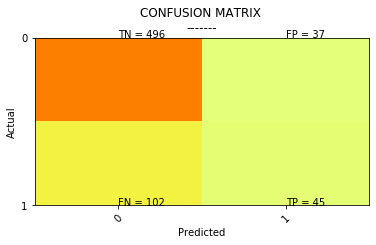

In [103]:
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['0','1']
plt.title('CONFUSION MATRIX \n-------')
plt.ylabel('Actual')
plt.xlabel('Predicted')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

In [104]:
####  ROC_AUC_SCORE    ######

metrics.roc_auc_score(actual,pre_c)

0.656826332784521

In [105]:
pred.value_counts()

0    598
1     82
dtype: int64

In [106]:
dtm_test2['left'].value_counts()

0.0    533
1.0    147
Name: left, dtype: int64

In [107]:
dtm_test2['left'].shape

(680,)

In [108]:
pre_c=log_model2.predict(dtm_test2)    ####   continous prob for test data   #####

In [109]:
fpr,tpr,thresholds=metrics.roc_curve(actual,pre_c)
x,y=np.arange(0,1.1,0.1),np.arange(0,1.1,0.1)

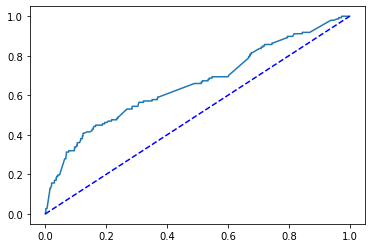

In [110]:
plt.plot(fpr,tpr,"-")
plt.plot(x,y,'b--')

In [111]:
#####  To find which students are likely to leave the courses within one year   ####   

In [112]:
dtm_test2["prob"]=log_model2.predict(dtm_test2)

In [113]:
dtm_test2['prob_deciles']=pd.qcut(dtm_test2['prob'],q=10)

In [114]:
dtm_test2['prob_deciles']

17      (0.216, 0.246]
18      (0.161, 0.186]
48      (0.194, 0.216]
67      (0.161, 0.186]
73      (0.161, 0.186]
             ...      
3367    (0.348, 0.908]
3370    (0.246, 0.348]
3377    (0.348, 0.908]
3390    (0.348, 0.908]
3394    (0.348, 0.908]
Name: prob_deciles, Length: 680, dtype: category
Categories (10, interval[float64]): [(0.0557, 0.0837] < (0.0837, 0.108] < (0.108, 0.141] < (0.141, 0.161] ... (0.194, 0.216] < (0.216, 0.246] < (0.246, 0.348] < (0.348, 0.908]]

In [115]:
gains=dtm_test2.groupby("prob_deciles",as_index=False)['left'].agg(['sum','count']).reset_index().sort_values("prob_deciles",
                 ascending=False)

In [116]:
gains

,prob_deciles,sum,count
9,"(0.348, 0.908]",29.0,54
8,"(0.246, 0.348]",32.0,82
7,"(0.216, 0.246]",11.0,64
6,"(0.194, 0.216]",13.0,72
5,"(0.186, 0.194]",2.0,14
4,"(0.161, 0.186]",15.0,122
3,"(0.141, 0.161]",16.0,68
2,"(0.108, 0.141]",9.0,49
1,"(0.0837, 0.108]",8.0,73
0,"(0.0557, 0.0837]",12.0,82


In [117]:
gains["PercEvents"]=gains['sum']/gains['sum'].sum()

In [118]:
gains["CumulativeEvents"]=gains.PercEvents.cumsum()

In [119]:
gains

,prob_deciles,sum,count,PercEvents,CumulativeEvents
9,"(0.348, 0.908]",29.0,54,0.197279,0.197279
8,"(0.246, 0.348]",32.0,82,0.217687,0.414966
7,"(0.216, 0.246]",11.0,64,0.074830,0.489796
6,"(0.194, 0.216]",13.0,72,0.088435,0.578231
5,"(0.186, 0.194]",2.0,14,0.013605,0.591837
4,"(0.161, 0.186]",15.0,122,0.102041,0.693878
3,"(0.141, 0.161]",16.0,68,0.108844,0.802721
2,"(0.108, 0.141]",9.0,49,0.061224,0.863946
1,"(0.0837, 0.108]",8.0,73,0.054422,0.918367
0,"(0.0557, 0.0837]",12.0,82,0.081633,1.000000


##### Top 25 students who are most likely to leave the course ######

In [120]:
###   top 25 students who are more likely to leave the course within one year   #####

dtm_test2.sort_values("prob",ascending=False)[['id']].head(25)

,id
3314,7822678.0
3353,7807563.0
3320,8001242.0
3271,7769324.0
3298,7780464.0
3189,7962852.0
3174,8031679.0
3251,7888524.0
3270,7978964.0
3257,7922261.0


### MODEL BUILDING   ## RANDOM FOREST CLASSIFIER  ## 


In [121]:
X5=dtm[['ST_2007','S_1_course_THEA','S_1_course_not_elected','S_1_grade_A','S_1_grade_B','S_2_course_BIOL','S_2_course_not_elected','S_2_grade_A','S_2_grade_B','S_attained_perc','amt_std_need','unmet_std_need','HIGH_SCHL_GPA','entrance_2']]

In [122]:
y5=dtm['left']

In [123]:
X5_train,X5_test,y5_train,y5_test=model_selection.train_test_split(X5,y5,test_size=0.20,random_state=200)

In [124]:
rf_model5=RandomForestClassifier(oob_score=True,n_jobs=-1,n_estimators=300,random_state=200).fit(X5_train,y5_train)

In [125]:
rf_pred5=rf_model5.predict(X5_test)

In [126]:
cmr=metrics.confusion_matrix(y5_test,rf_pred5)
cmr

array([[504,  29],
       [112,  35]], dtype=int64)

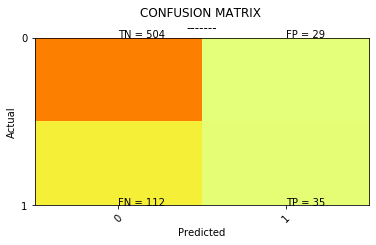

In [127]:
plt.clf()
plt.imshow(cmr, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['0','1']
plt.title('CONFUSION MATRIX \n-------')
plt.ylabel('Actual')
plt.xlabel('Predicted')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cmr[i][j]))
plt.show()

######  ACCURACY SCORE    #####      

In [128]:
logistic_accuracy=metrics.accuracy_score(actual,pred)          ###  1  ####   for LOGISTIC MODEL   #####
logistic_accuracy

0.7955882352941176

In [129]:
randomForest_accuracy=metrics.accuracy_score(y5_test,rf_pred5) ### 2  ####   for RANDOM FOREST CLASSIFIER  ####
randomForest_accuracy

0.7926470588235294

### INTERPRETATION  ####

1. Unmet Percent:
	Increase in unmet student need percent, Increase in likelihood that the student will leave the college within one year.

2. S_1_Course_notelected:
	Students who are not elected any course for 1st course of Second term, Increase in likelihood that student will leave the college within one year.

3. S_2_Course_notelected:
	Students who are not elected any course for   2nd  course of Second term, Increase in likelihood that student will leave the college within one year.

4. S_Attained_percent:
	Increase in Attained percent on Second term, Increase the likelihood that student will continue for the next semester.
	Students who have lesser Attained percent on Second term, are most likely to leave the college.

5. ST_2007:
	Students who enrolled in the batch of 2007, are most likely to continue the college for next semester.

6. S_Grade _B (1st & 2nd course):
	Students who secured Grade B on 1st and 2nd course, increase in likelihood that student will continue the college for next semester.

####  SUGGESTIONS######

DISTANCE FROM HOME :
1. Admit more number of  students who have the home in the distance of   85 km or lesser from college, those students have more likelihood to continue the college.
2. Reduce admitting the students who have more than 115 km in distance, more likely to leave the college.
